In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG
from classes.plotter import BasicOpticalGatingPlotter as BOGP

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
og = BOG()
og.set_sequence("D:/Data/both 800fps/brightfield/*tif")
og.set_reference_sequence("D:/Data/both 800fps/ref_seq.tif")
og.set_reference_period(3.062623721828068710e+02)
og.run()

og_lf = BOG()
og_lf.set_sequence("D:/Data/both 800fps/brightfield/*tif")
og_lf.set_reference_sequence("D:/Data/both 800fps/ref_seq.tif")
og_lf.set_reference_period(3.062623721828068710e+02)
og_lf.reduce_reference_framerate(4)
og_lf.run()

BOG i Loading sequence...
BOG ✓ Sequence loaded with 2000 frames
BOG i Loading reference sequence...
BOG ✓ Reference sequence loaded with 311 frames
BOG i Setting reference period to None
BOG i Calculating SADs...
BOG ✓ SADs calculated
BOG i Calculating phases...
BOG ⚠ Subframe minima outside range -1.1809516251216252 setting to -0.5
BOG ⚠ Subframe minima outside range -1.2729505820253615 setting to -0.5
BOG ⚠ Subframe minima outside range -1.6514048293934018 setting to -0.5
BOG ⚠ Subframe minima outside range 1.5274655414209617 setting to 0.5
BOG ⚠ Subframe minima outside range 1.2389907874583628 setting to 0.5
BOG ⚠ Subframe minima outside range 1.19413485171044 setting to 0.5
BOG ⚠ Subframe minima outside range 0.5532822826707683 setting to 0.5
BOG ⚠ Subframe minima outside range 0.5189023782546307 setting to 0.5
BOG ✓ Phases calculated
BOG i Calculating delta phases...
BOG ✓ Delta phases calculated
BOG i Unwrapping phases...
BOG ✓ Unwrapped phases calculated
BOG ✓ Finished processi

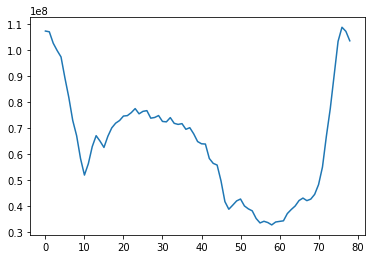

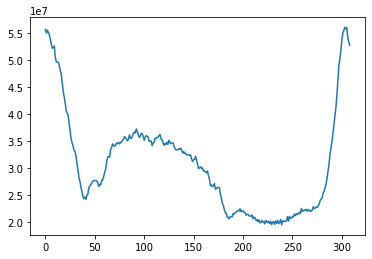

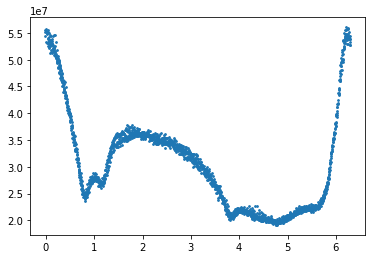

In [4]:
diffs = []
for i in range(2,og_lf.reference_sequence.shape[0]):
    diffs.append(np.sum(np.abs(og_lf.reference_sequence[i].astype(np.int32) - og_lf.reference_sequence[i - 1].astype(np.int32))))

plt.plot(diffs)
plt.show()

diffs = []
for i in range(2,og.reference_sequence.shape[0]):
    diffs.append(np.sum(np.abs(og.reference_sequence[i].astype(np.int32) - og.reference_sequence[i - 1].astype(np.int32))))

plt.plot(diffs)
plt.show()

diffs = []
for i in range(2,og.sequence.shape[0]):
    diffs.append(np.sum(np.abs(og.sequence[i].astype(np.int32) - og.sequence[i - 1].astype(np.int32))))

plt.scatter(og.phases[2::], diffs, s = 3)
plt.show()

OGP i Plotting SADs against frame number for frame: 400


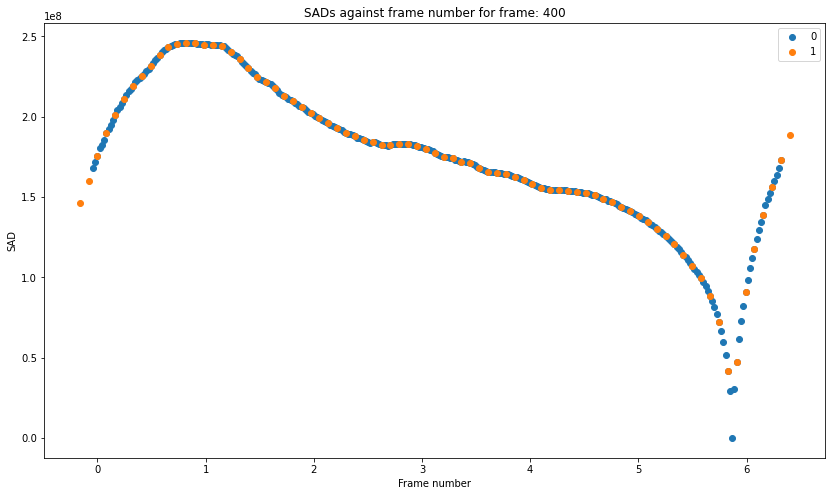

OGP i Plotting SADs against frame number for frame: 475


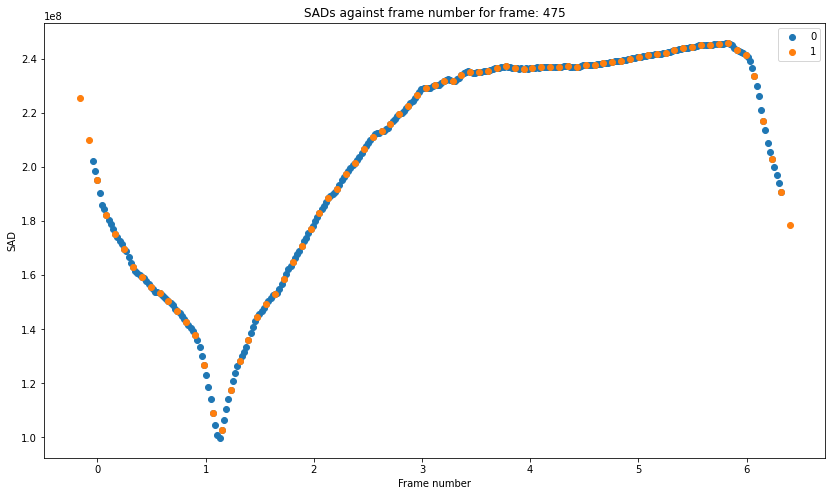

OGP i Plotting Delta phases against phases


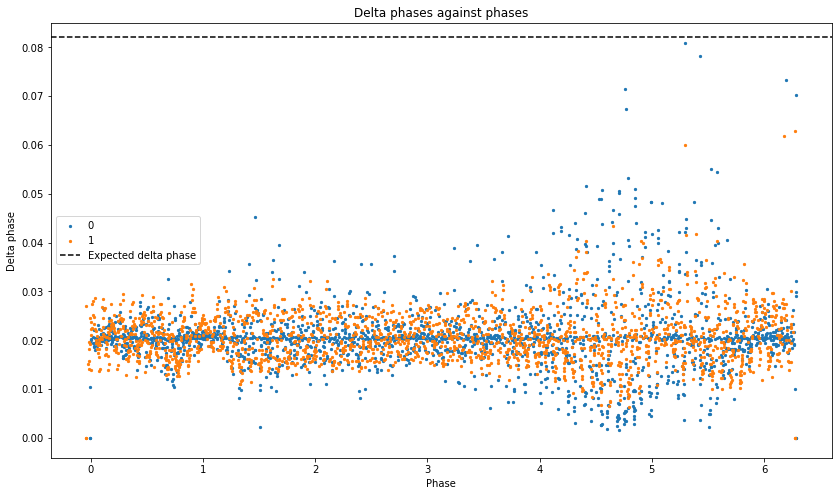

In [5]:
bogp = BOGP([og, og_lf])
bogp.plot_sads(400)
bogp.plot_sads(475)
bogp.plot_delta_phases_phases()

TypeError: '>' not supported between instances of 'float' and 'builtin_function_or_method'

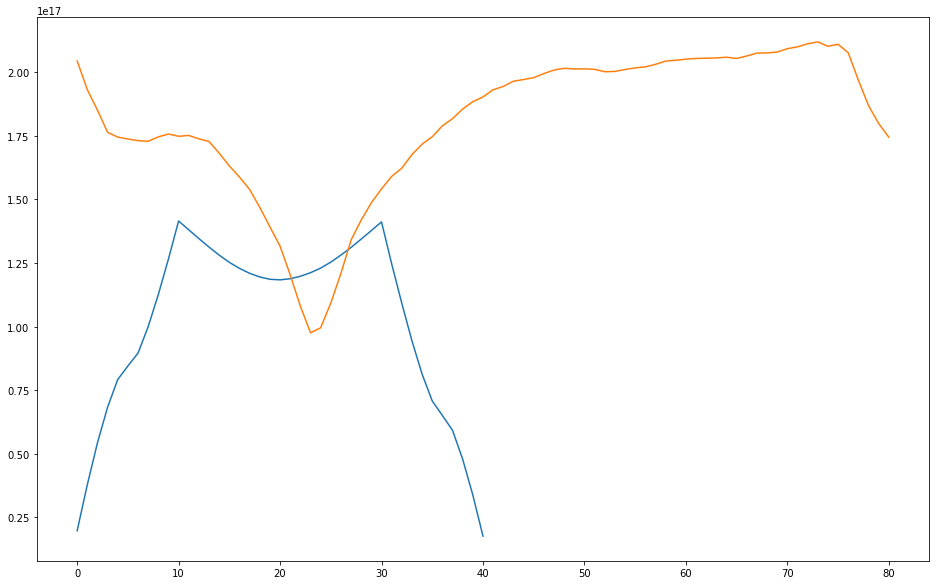

In [6]:
minima_frame = 200
frame = 506

min_lf = np.argmin(og_lf.sads[frame][2:-2]) + 2
min_hf = np.argmin(og.sads[frame][2:-2]) + 2
plt.figure(figsize = (16,10))
plt.plot(np.correlate(og_lf.sads[minima_frame][min_lf - 5:min_lf+6], og.sads[frame][min_hf - 15:min_hf + 16], mode = "full"))
plt.plot(og_lf.sads[frame] * 1000000000)
plt.axvline(min, ls = ":", lw = 1, c = "black")
plt.show()

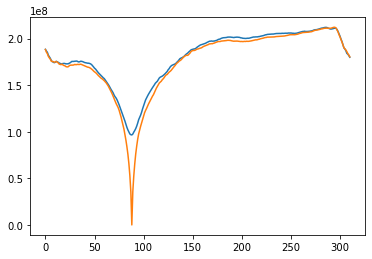

13


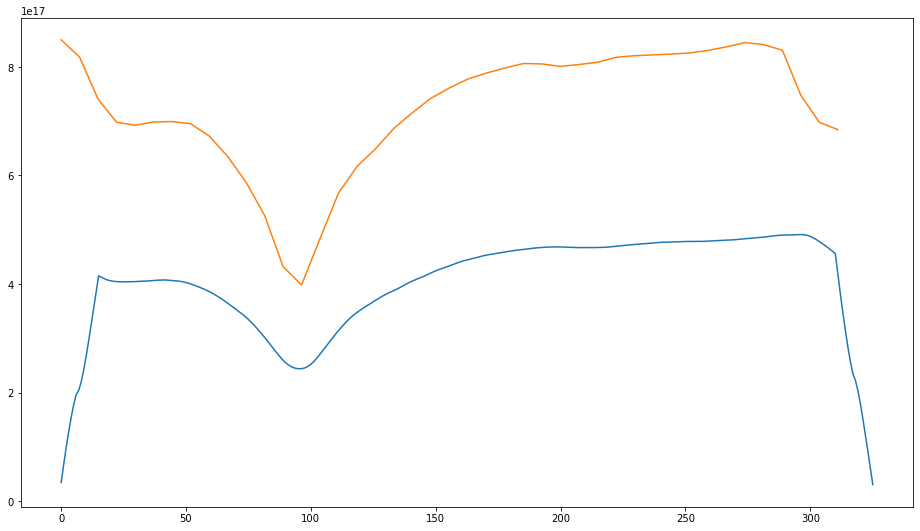

88
88


In [ ]:
plt.plot(og.sads[506])
plt.plot(og.sads[200])
plt.show()

min = np.argmin(og_lf.sads[506])
print(min)
plt.figure(figsize = (16,9))
plt.plot(np.correlate(og.sads[506], og_lf.sads[200][min - 8:min + 8], mode = "full"))
plt.plot(np.linspace(0, og.sads[0].shape[0], og_lf.sads[0].shape[0]), og_lf.sads[506] * 4000000000)
plt.show()
print(np.argmin(og.sads[200]))
print(np.argmin(np.correlate(og.sads[506], og_lf.sads[200][min - 4:min + 4], mode = "valid")) + 4)

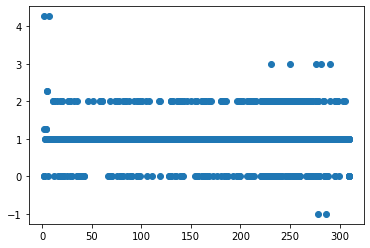

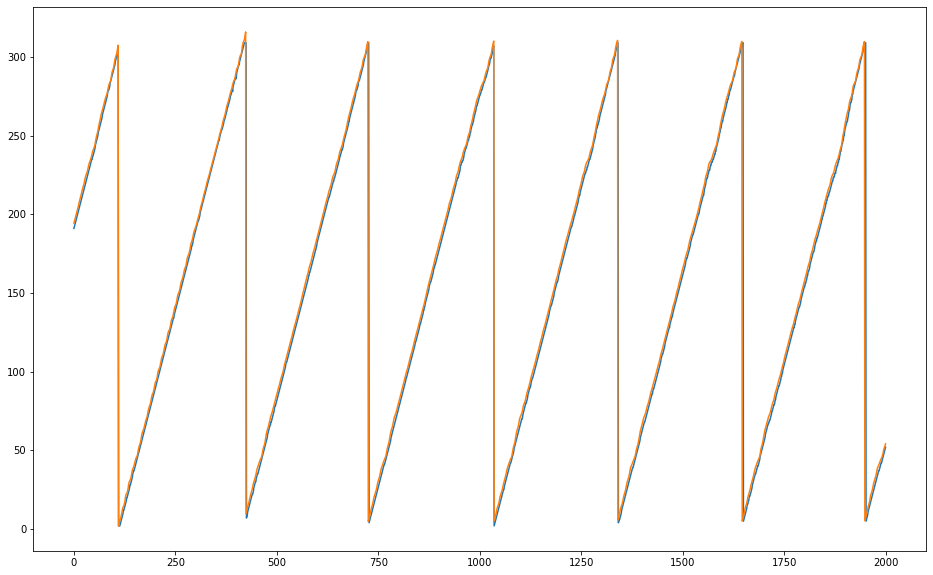

In [ ]:
phases = []
for frame in range(og_lf.sads.shape[0]):
    minima = np.argmin(og_lf.sads[frame][2:-2]) + 2
    sad_to_convolve = og_lf.sads[frame][minima-2:minima+2]
    """plt.plot(np.convolve(og.sads[frame], sad_to_convolve, mode = "full") )
    plt.plot(og_lf.sads[frame] * 1000000000)
    plt.show()"""
    phase = np.argmin(np.correlate(og.sads[frame], sad_to_convolve, mode = "valid")) + 2
    phases.append(phase)

phases = np.array(phases)

delta_phases = []
for i in range(1, phases.shape[0]):

    delta_phase = phases[i] - phases[i-1]

    while delta_phase < -og.reference_period / 2:
        delta_phase += og.reference_period

    delta_phases.append(delta_phase)

plt.scatter(phases[1::], delta_phases)
plt.show()

plt.figure(figsize = (16,10))
plt.plot(phases)
plt.plot(og_lf.phases / (2 * np.pi) * 306 + 6)
plt.show()

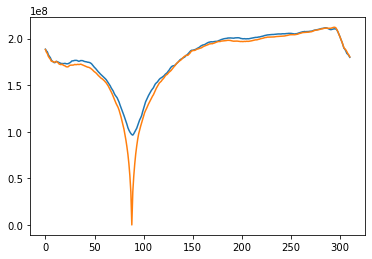

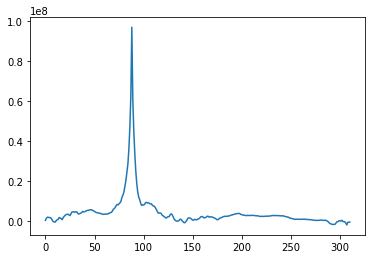

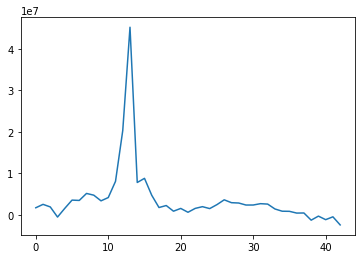

In [ ]:
plt.plot(og.sads[507])
plt.plot(og.sads[200])
plt.show()

plt.plot(og.sads[507]-og.sads[200])
plt.show()



plt.plot(og_lf.sads[507]-og_lf.sads[200])
plt.show()